# Digit Recognizer: MNIST Dataset




## Introduction


## Exploring the data

The Optical Recognition of Handwritten Digits dataset consists of 42000 records of 785 features. Kaggle also makes available a test dataset of 28000 entries. The first feature is the label for the data. This feature describes which digit was written by a human. The additional 784 features represent a 28 by 28 image grid and the itensity value associated with it. This image is a pixel representation of the handwritten digit. Moreover, the intensity value ranges from 0 to 255 and it represents the lightness or darkness of that pixel. Below you can observe a few images generated from dataset. More information about the dataset can be found at the Kaggle challenge page, and the images were generated by me.

For conciseness, the data is already loaded on a R workspace.

In [1]:
load("./digit-recon.RData")

Below you can observe the first 12 training entries on the dataset.

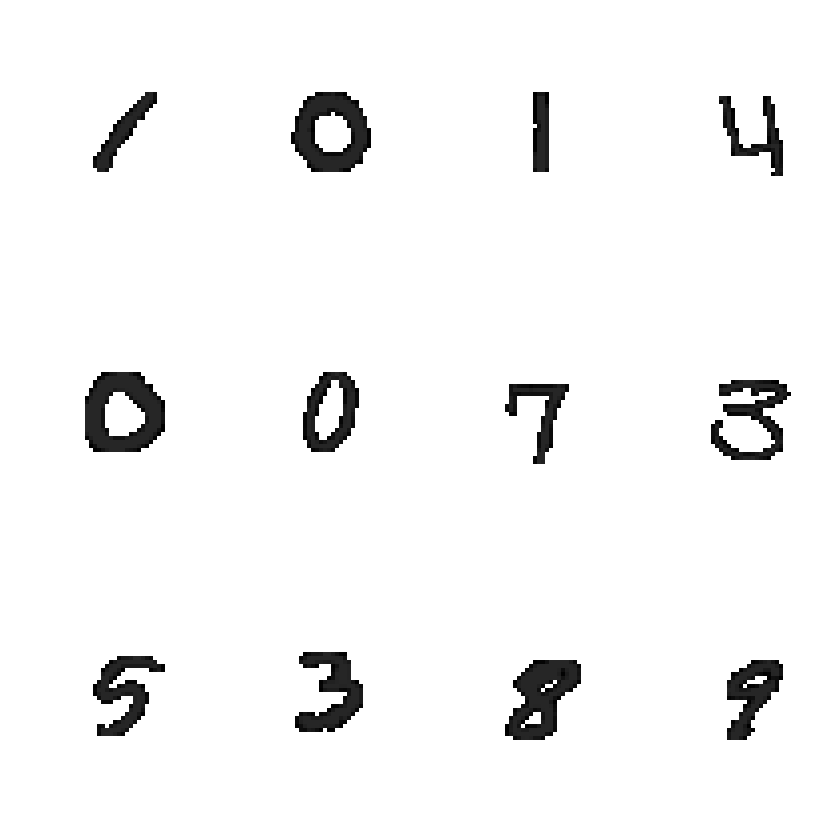

In [15]:
source(file = "plotDigit.R")

generatePlots(train)

### Useful features

From this images we can make some initial observations that may aid our classification algorithm. In the images above, pixels close to the border have no itensity associated with them. This indicates that there may be features that do not provide us with useful information for a classification task. This is indeed the case as it can see by applying R's summary function to the dataset, and several pixel entries have a mean of zero. 

## Feature Engineering

### PCA

### Density

## Model Training

### Linear

### K Nearest

### Random Forest


